In [2]:
# Установим библиотеку. -q - тихая установка
!pip install -q rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 40.2 MB/s eta 0:00:00


In [1]:
# Необходимые библиотеки
import os
import requests
import rasterio
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageSequence
from tqdm import tqdm

In [2]:
# Отключаем предупреждения. Мы знаем, что делаем
import warnings
warnings.filterwarnings("ignore")

# Получение данных

Для получения данных мы можем использовать `requests`, который получает "сырые" пакеты, сохраняет их в файл

In [5]:
# Куки
cookies = {
    'drive-sharing-Zwb1wnpwOJrnZKjNnrPUMoMdM-bVkL9l-krfAWJ7PSwo': '6TnlFg29j3eGk0hzssAx2DK7VmCPiUchGluJ9AIN9Pf6cgqWve2YUAfRIC0NHra9t.I5_bkEFPPxpCTKscE6Kaz7U3ihH3tKASD8YDZtlf52dqNRPQ6tBiZ.hq3.JE_L_MvgQTaodo34fi5Hemms.an4sWr2WiA_rV_b9Pv9LgxNK7M_sBXurpqysNZGBhM4GKXQCdds_XvsOyDS7nNGQA5BycBWd3W1kY3DOEd.3SEPxpE5PvaPpdrf',
    '_SSID': 'Jf-Tbjpu_Kz3cCc6NBAmNjdfEx9vKkQbQC7lTF78wFc',
    '_CrPoSt': 'cHJvdG9jb2w9aHR0cHM6OyBwb3J0PTU2ODY3OyBwYXRobmFtZT0vZC9zL3NueU9BdHJnQ0pqcDBNU294UTFmODBEUDRnU2J0QnJML1p3YjF3bnB3T0pyblpLak5uclBVTW9NZE0tYlZrTDlsLWtyZkFXSjdQU3dvOw%3D%3D',
}

# Заголовки
headers = {
    'authority': 'mjeka.direct.quickconnect.to:56867',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'ru,en;q=0.9',
    'dnt': '1',
    'referer': 'https://mjeka.direct.quickconnect.to:56867/d/s/snyOAtrgCJjp0MSoxQ1f80DP4gSbtBrL/Zwb1wnpwOJrnZKjNnrPUMoMdM-bVkL9l-krfAWJ7PSwo',
    'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "YaBrowser";v="23"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'iframe',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 YaBrowser/23.3.1.895 Yowser/2.5 Safari/537.36',
}

# Параметры запроса
params = {
    'api': 'SYNO.SynologyDrive.Files',
    'method': 'download',
    'version': '2',
    'files': '["id:741914470661535498"]',
    'force_download': 'true',
    'json_error': 'true',
    'c2_offload': '"allow"',
    '_dc': '1681249293243',
    'sharing_token': '"6TnlFg29j3eGk0hzssAx2DK7VmCPiUchGluJ9AIN9Pf6cgqWve2YUAfRIC0NHra9t.I5_bkEFPPxpCTKscE6Kaz7U3ihH3tKASD8YDZtlf52dqNRPQ6tBiZ.hq3.JE_L_MvgQTaodo34fi5Hemms.an4sWr2WiA_rV_b9Pv9LgxNK7M_sBXurpqysNZGBhM4GKXQCdds_XvsOyDS7nNGQA5BycBWd3W1kY3DOEd.3SEPxpE5PvaPpdrf"',
}

# Отправляем запрос с нашими данными
response = requests.get(
    'https://mjeka.direct.quickconnect.to:56867/d/s/snyOAtrgCJjp0MSoxQ1f80DP4gSbtBrL/webapi/entry.cgi/2018.08.09_Field_14_VIS.tif',
    params=params,
    cookies=cookies,
    headers=headers,
)

Осторожно, работает долго!

In [6]:
# Если статус 200 (успешно), то сохраняем в файл
if response.status_code == 200:
    # Используя контекстный менеджер, сохраняем по 1024 байта
    with open("2018.08.09_Field_14_VIS.tif", 'wb') as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)
else:
    print("Ошибка при загрузке файла.")

## Пример загрузки других файлов

In [7]:
import requests

cookies = {
    'drive-sharing-Zwb1wnpwOJrnZKjNnrPUMoMdM-bVkL9l-krfAWJ7PSwo': '6TnlFg29j3eGk0hzssAx2DK7VmCPiUchGluJ9AIN9Pf6cgqWve2YUAfRIC0NHra9t.I5_bkEFPPxpCTKscE6Kaz7U3ihH3tKASD8YDZtlf52dqNRPQ6tBiZ.hq3.JE_L_MvgQTaodo34fi5Hemms.an4sWr2WiA_rV_b9Pv9LgxNK7M_sBXurpqysNZGBhM4GKXQCdds_XvsOyDS7nNGQA5BycBWd3W1kY3DOEd.3SEPxpE5PvaPpdrf',
    '_SSID': 'Jf-Tbjpu_Kz3cCc6NBAmNjdfEx9vKkQbQC7lTF78wFc',
    '_CrPoSt': 'cHJvdG9jb2w9aHR0cHM6OyBwb3J0PTU2ODY3OyBwYXRobmFtZT0vZC9zL3NueU9BdHJnQ0pqcDBNU294UTFmODBEUDRnU2J0QnJML1p3YjF3bnB3T0pyblpLak5uclBVTW9NZE0tYlZrTDlsLWtyZkFXSjdQU3dvOw%3D%3D',
}

headers = {
    'authority': 'mjeka.direct.quickconnect.to:56867',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'ru,en;q=0.9',
    # 'cookie': 'drive-sharing-Zwb1wnpwOJrnZKjNnrPUMoMdM-bVkL9l-krfAWJ7PSwo=6TnlFg29j3eGk0hzssAx2DK7VmCPiUchGluJ9AIN9Pf6cgqWve2YUAfRIC0NHra9t.I5_bkEFPPxpCTKscE6Kaz7U3ihH3tKASD8YDZtlf52dqNRPQ6tBiZ.hq3.JE_L_MvgQTaodo34fi5Hemms.an4sWr2WiA_rV_b9Pv9LgxNK7M_sBXurpqysNZGBhM4GKXQCdds_XvsOyDS7nNGQA5BycBWd3W1kY3DOEd.3SEPxpE5PvaPpdrf; _SSID=Jf-Tbjpu_Kz3cCc6NBAmNjdfEx9vKkQbQC7lTF78wFc; _CrPoSt=cHJvdG9jb2w9aHR0cHM6OyBwb3J0PTU2ODY3OyBwYXRobmFtZT0vZC9zL3NueU9BdHJnQ0pqcDBNU294UTFmODBEUDRnU2J0QnJML1p3YjF3bnB3T0pyblpLak5uclBVTW9NZE0tYlZrTDlsLWtyZkFXSjdQU3dvOw%3D%3D',
    'dnt': '1',
    'referer': 'https://mjeka.direct.quickconnect.to:56867/d/s/snyOAtrgCJjp0MSoxQ1f80DP4gSbtBrL/Zwb1wnpwOJrnZKjNnrPUMoMdM-bVkL9l-krfAWJ7PSwo',
    'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "YaBrowser";v="23"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'iframe',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 YaBrowser/23.3.1.895 Yowser/2.5 Safari/537.36',
}

params = {
    'api': 'SYNO.SynologyDrive.Files',
    'method': 'download',
    'version': '2',
    'files': '["id:741914087799174775"]',
    'force_download': 'true',
    'json_error': 'true',
    'c2_offload': '"allow"',
    '_dc': '1681249285896',
    'sharing_token': '"6TnlFg29j3eGk0hzssAx2DK7VmCPiUchGluJ9AIN9Pf6cgqWve2YUAfRIC0NHra9t.I5_bkEFPPxpCTKscE6Kaz7U3ihH3tKASD8YDZtlf52dqNRPQ6tBiZ.hq3.JE_L_MvgQTaodo34fi5Hemms.an4sWr2WiA_rV_b9Pv9LgxNK7M_sBXurpqysNZGBhM4GKXQCdds_XvsOyDS7nNGQA5BycBWd3W1kY3DOEd.3SEPxpE5PvaPpdrf"',
}

response = requests.get(
    'https://mjeka.direct.quickconnect.to:56867/d/s/snyOAtrgCJjp0MSoxQ1f80DP4gSbtBrL/webapi/entry.cgi/2013.06.16_VID.tif',
    params=params,
    cookies=cookies,
    headers=headers,
)

In [8]:
# Если статус 200 (успешно), то сохраняем в файл
if response.status_code == 200:
    # Используя контекстный менеджер, сохраняем по 1024 байта
    with open("2013.06.16_VID.tif", 'wb') as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)
else:
    print("Ошибка при загрузке файла.")

In [9]:
del response

In [10]:
import requests

cookies = {
    'drive-sharing-Zwb1wnpwOJrnZKjNnrPUMoMdM-bVkL9l-krfAWJ7PSwo': '6TnlFg29j3eGk0hzssAx2DK7VmCPiUchGluJ9AIN9Pf6cgqWve2YUAfRIC0NHra9t.I5_bkEFPPxpCTKscE6Kaz7U3ihH3tKASD8YDZtlf52dqNRPQ6tBiZ.hq3.JE_L_MvgQTaodo34fi5Hemms.an4sWr2WiA_rV_b9Pv9LgxNK7M_sBXurpqysNZGBhM4GKXQCdds_XvsOyDS7nNGQA5BycBWd3W1kY3DOEd.3SEPxpE5PvaPpdrf',
    '_SSID': 'Jf-Tbjpu_Kz3cCc6NBAmNjdfEx9vKkQbQC7lTF78wFc',
    '_CrPoSt': 'cHJvdG9jb2w9aHR0cHM6OyBwb3J0PTU2ODY3OyBwYXRobmFtZT0vZC9zL3NueU9BdHJnQ0pqcDBNU294UTFmODBEUDRnU2J0QnJML1p3YjF3bnB3T0pyblpLak5uclBVTW9NZE0tYlZrTDlsLWtyZkFXSjdQU3dvOw%3D%3D',
}

headers = {
    'authority': 'mjeka.direct.quickconnect.to:56867',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7',
    'accept-language': 'ru,en;q=0.9',
    # 'cookie': 'drive-sharing-Zwb1wnpwOJrnZKjNnrPUMoMdM-bVkL9l-krfAWJ7PSwo=6TnlFg29j3eGk0hzssAx2DK7VmCPiUchGluJ9AIN9Pf6cgqWve2YUAfRIC0NHra9t.I5_bkEFPPxpCTKscE6Kaz7U3ihH3tKASD8YDZtlf52dqNRPQ6tBiZ.hq3.JE_L_MvgQTaodo34fi5Hemms.an4sWr2WiA_rV_b9Pv9LgxNK7M_sBXurpqysNZGBhM4GKXQCdds_XvsOyDS7nNGQA5BycBWd3W1kY3DOEd.3SEPxpE5PvaPpdrf; _SSID=Jf-Tbjpu_Kz3cCc6NBAmNjdfEx9vKkQbQC7lTF78wFc; _CrPoSt=cHJvdG9jb2w9aHR0cHM6OyBwb3J0PTU2ODY3OyBwYXRobmFtZT0vZC9zL3NueU9BdHJnQ0pqcDBNU294UTFmODBEUDRnU2J0QnJML1p3YjF3bnB3T0pyblpLak5uclBVTW9NZE0tYlZrTDlsLWtyZkFXSjdQU3dvOw%3D%3D',
    'dnt': '1',
    'referer': 'https://mjeka.direct.quickconnect.to:56867/d/s/snyOAtrgCJjp0MSoxQ1f80DP4gSbtBrL/Zwb1wnpwOJrnZKjNnrPUMoMdM-bVkL9l-krfAWJ7PSwo',
    'sec-ch-ua': '"Chromium";v="110", "Not A(Brand";v="24", "YaBrowser";v="23"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-fetch-dest': 'iframe',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 YaBrowser/23.3.1.895 Yowser/2.5 Safari/537.36',
}

params = {
    'api': 'SYNO.SynologyDrive.Files',
    'method': 'download',
    'version': '2',
    'files': '["id:741914360462489303"]',
    'force_download': 'true',
    'json_error': 'true',
    'c2_offload': '"allow"',
    '_dc': '1681249295299',
    'sharing_token': '"6TnlFg29j3eGk0hzssAx2DK7VmCPiUchGluJ9AIN9Pf6cgqWve2YUAfRIC0NHra9t.I5_bkEFPPxpCTKscE6Kaz7U3ihH3tKASD8YDZtlf52dqNRPQ6tBiZ.hq3.JE_L_MvgQTaodo34fi5Hemms.an4sWr2WiA_rV_b9Pv9LgxNK7M_sBXurpqysNZGBhM4GKXQCdds_XvsOyDS7nNGQA5BycBWd3W1kY3DOEd.3SEPxpE5PvaPpdrf"',
}

response = requests.get(
    'https://mjeka.direct.quickconnect.to:56867/d/s/snyOAtrgCJjp0MSoxQ1f80DP4gSbtBrL/webapi/entry.cgi/20210721_F25_Micasense.tif',
    params=params,
    cookies=cookies,
    headers=headers,
)

In [11]:
# Если статус 200 (успешно), то сохраняем в файл
if response.status_code == 200:
    # Используя контекстный менеджер, сохраняем по 1024 байта
    with open("20210721_F25_Micasense.tif", 'wb') as f:
        for chunk in response.iter_content(1024):
            f.write(chunk)
else:
    print("Ошибка при загрузке файла.")

In [12]:
del response

# Работа с данными

Создадим класс для обработки файла

In [3]:
class TiffProcessor:
    """
    Класс обработки tiff-файлов
    """
    def __init__(self, input_file):
        """
        Инициализация класса
        """
        self.input_file = input_file
        self.output_pathes = []

    def resize_layers(self, input_files=None, size=(1200, 1200)):
        """
        Изменение размера изображения
        """
        # Если не задавали название файла, возьмем главный файл
        if input_files is None:
            input_files = self.output_pathes

        # Для кажого файла и списка
        for file in tqdm(input_files):   
            # С помощью контекстного менеджера
            with Image.open(file) as tif:
                # Для каждого слоя
                for idx, page in enumerate(ImageSequence.Iterator(tif)):
                    # Задаем размер
                    new_size = size
                    # Применяем преобразование
                    try:
                        resized_page = page.resize(new_size, resample=Image.LANCZOS)
                    except ValueError:
                        # Преобразуем изображение в поддерживаемый режим (например, 8-битный)
                        img_array = np.array(page)
                        img_min, img_max = img_array.min(), img_array.max()
                        img_8bit = (((img_array - img_min) / (img_max - img_min)) * 255).astype("uint8")

                        # Изменяем размер изображения и сохраняем его
                        resized_page = Image.fromarray(img_8bit).resize(new_size, resample=Image.LANCZOS)
                    # Сохраняем файл
                    output_file = f'{file}_resized.tif'
                    resized_page.save(output_file)

    def split_bands(self, show=True):
        """
        Разделение файла tiff на слой
        """
        # Открываем файл, смотрим количество слоев
        dataset = rasterio.open(self.input_file)
        num_bands = dataset.count

        if show is True:
            # Получить метаданные изображения
            metadata = dataset.meta

            # Вывести метаданные
            print("Количество слоев:", metadata["count"])
            print("Размерность:", (metadata["width"], metadata["height"]))
            print("Пространственная привязка:\n", metadata["transform"])

        # Для каждого слоя
        for i in tqdm(range(num_bands)):
            # Читаем его
            band = dataset.read(i + 1)

            # Задаем название вывода
            output_file = os.path.splitext(self.input_file)[0] + "_band" + str(i + 1) + ".tif"
            # С помощью контекстного менеджера записываем слой в файл
            with rasterio.open(
                output_file,
                'w',
                driver='GTiff',
                width=dataset.width,
                height=dataset.height,
                count=1,
                dtype=band.dtype,
                crs=dataset.crs,
                transform=dataset.transform,
            ) as outfile:
                outfile.write(band, 1)
            self.output_pathes.append(output_file)
            del band

    def show_file(self, input_file=None, title='Слой'):
        """
        Вывод tiff-файла на экран
        """
        # Если не задавали название файла, возьмем главный файл
        if input_file is None:
            input_file = self.input_file
        # Считаем его
        dataset = rasterio.open(input_file)
        
        # Зададим параметры вывода
        plt.figure(dpi=300)
        plt.imshow(dataset.read(1))
        plt.title(title)
        plt.show()

In [4]:
# Параметры работы класса
input_file = "2018.08.09_Field_14_VIS.tif"
size = (1200, 1200)

In [5]:
# Задаем любое количество пикселов при работе библиотеки, иначе будет ошибка
Image.MAX_IMAGE_PIXELS = None

In [6]:
tiff_processor = TiffProcessor(input_file)

In [7]:
tiff_processor.split_bands()

Количество слоев: 4
Размерность: (43450, 48423)
Пространственная привязка:
 | 0.00, 0.00, 29.99|
| 0.00,-0.00, 59.42|
| 0.00, 0.00, 1.00|


100%|██████████| 4/4 [04:01<00:00, 60.49s/it]


In [8]:
tiff_processor.resize_layers(size=size)

100%|██████████| 4/4 [01:20<00:00, 20.11s/it]


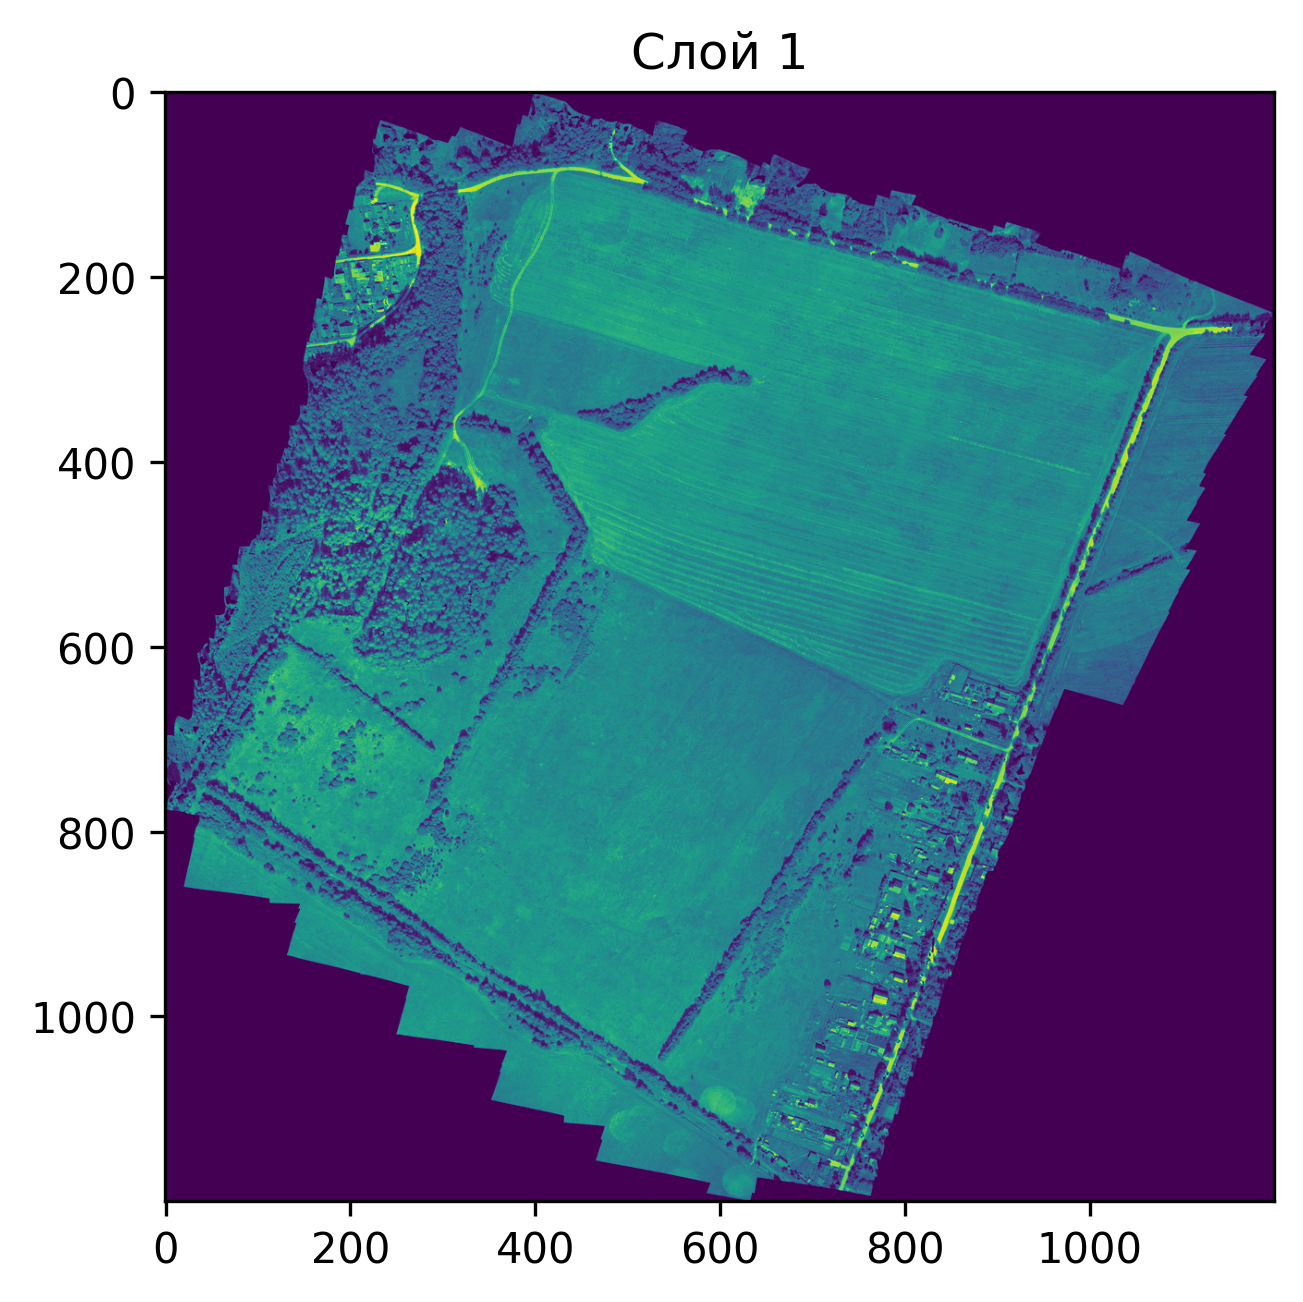

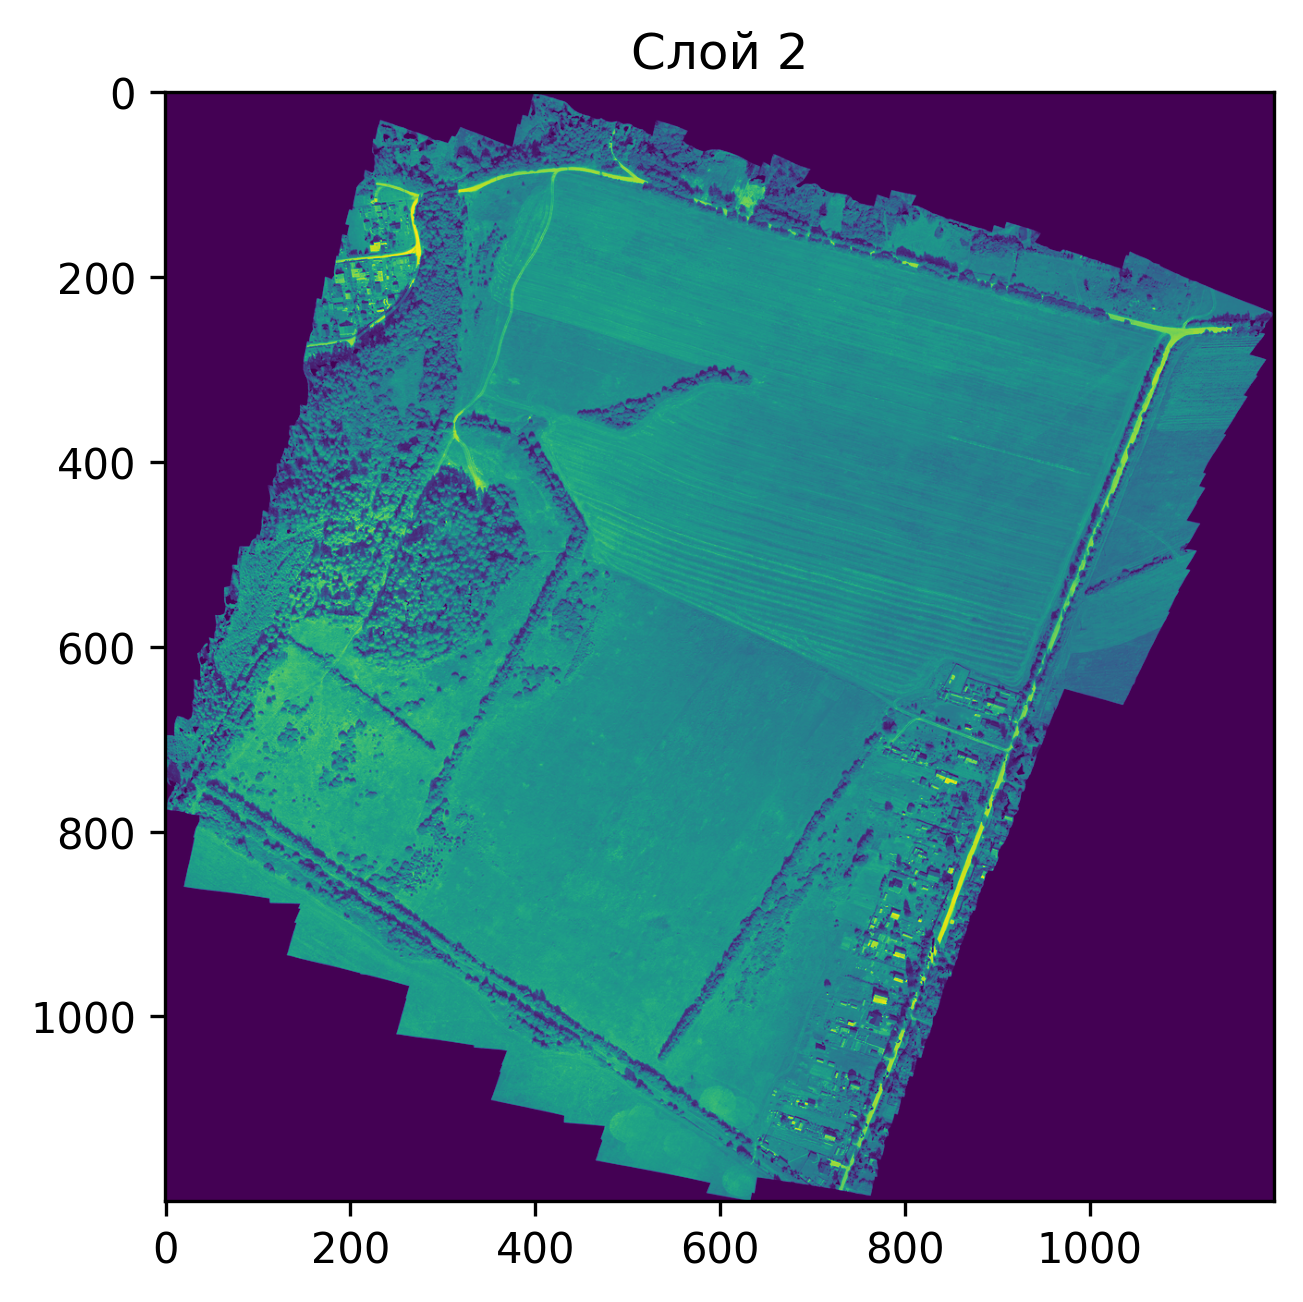

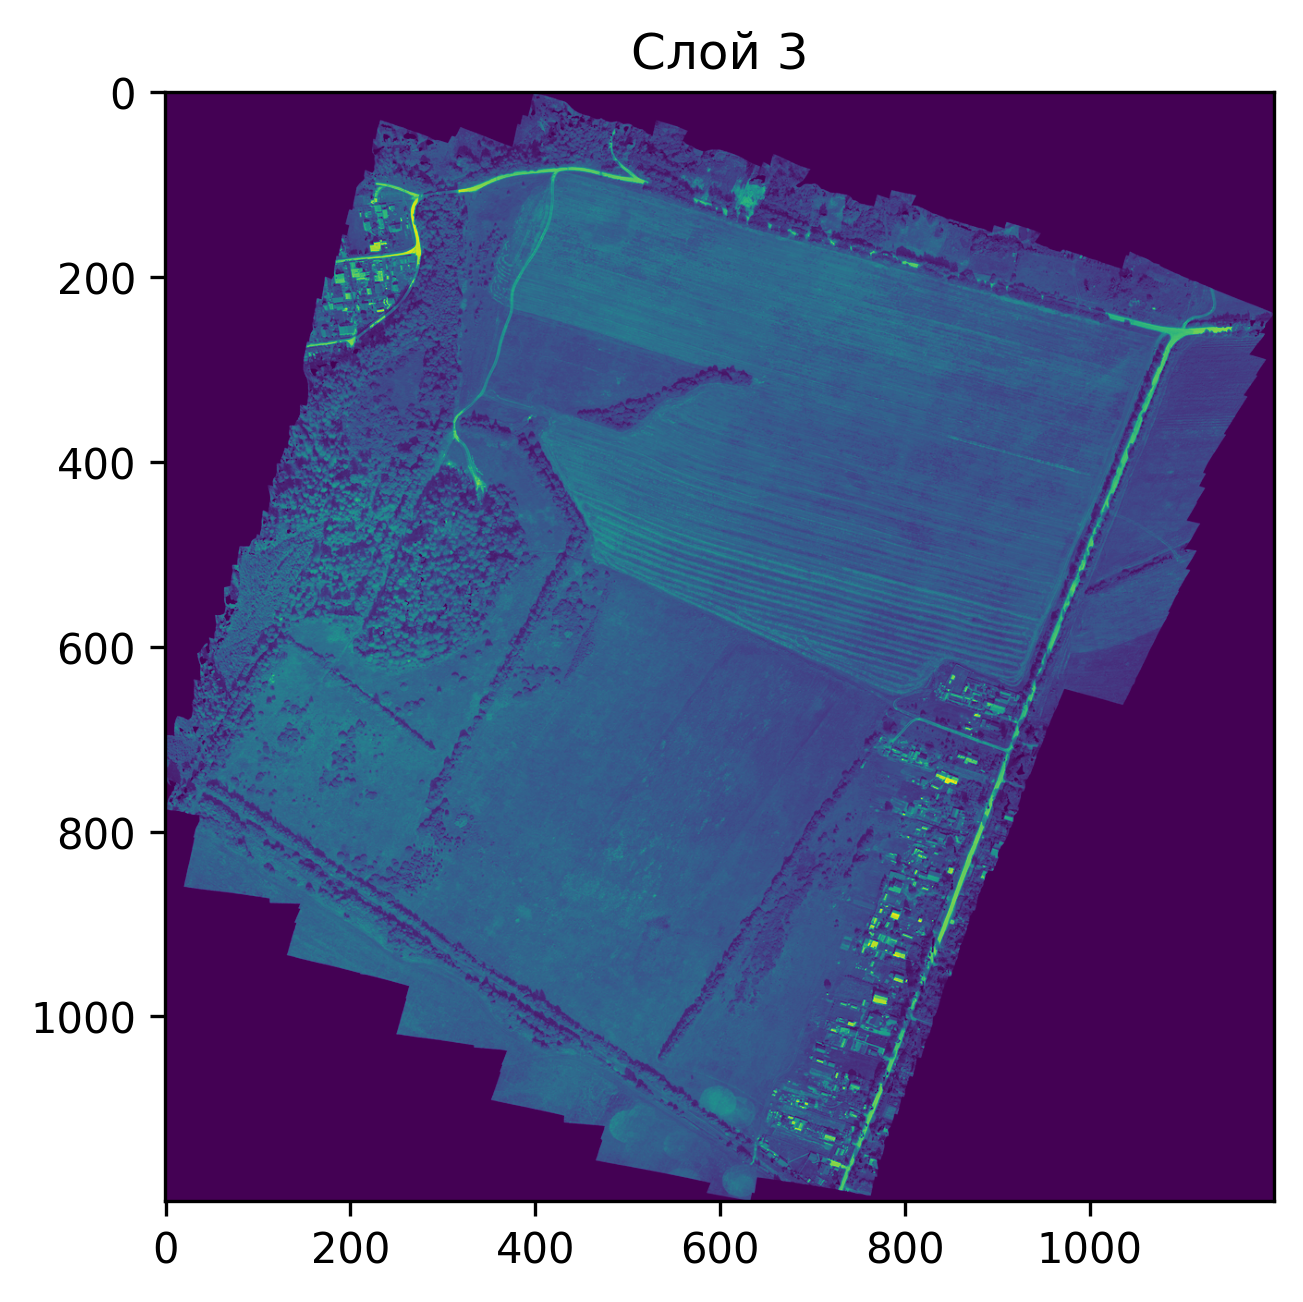

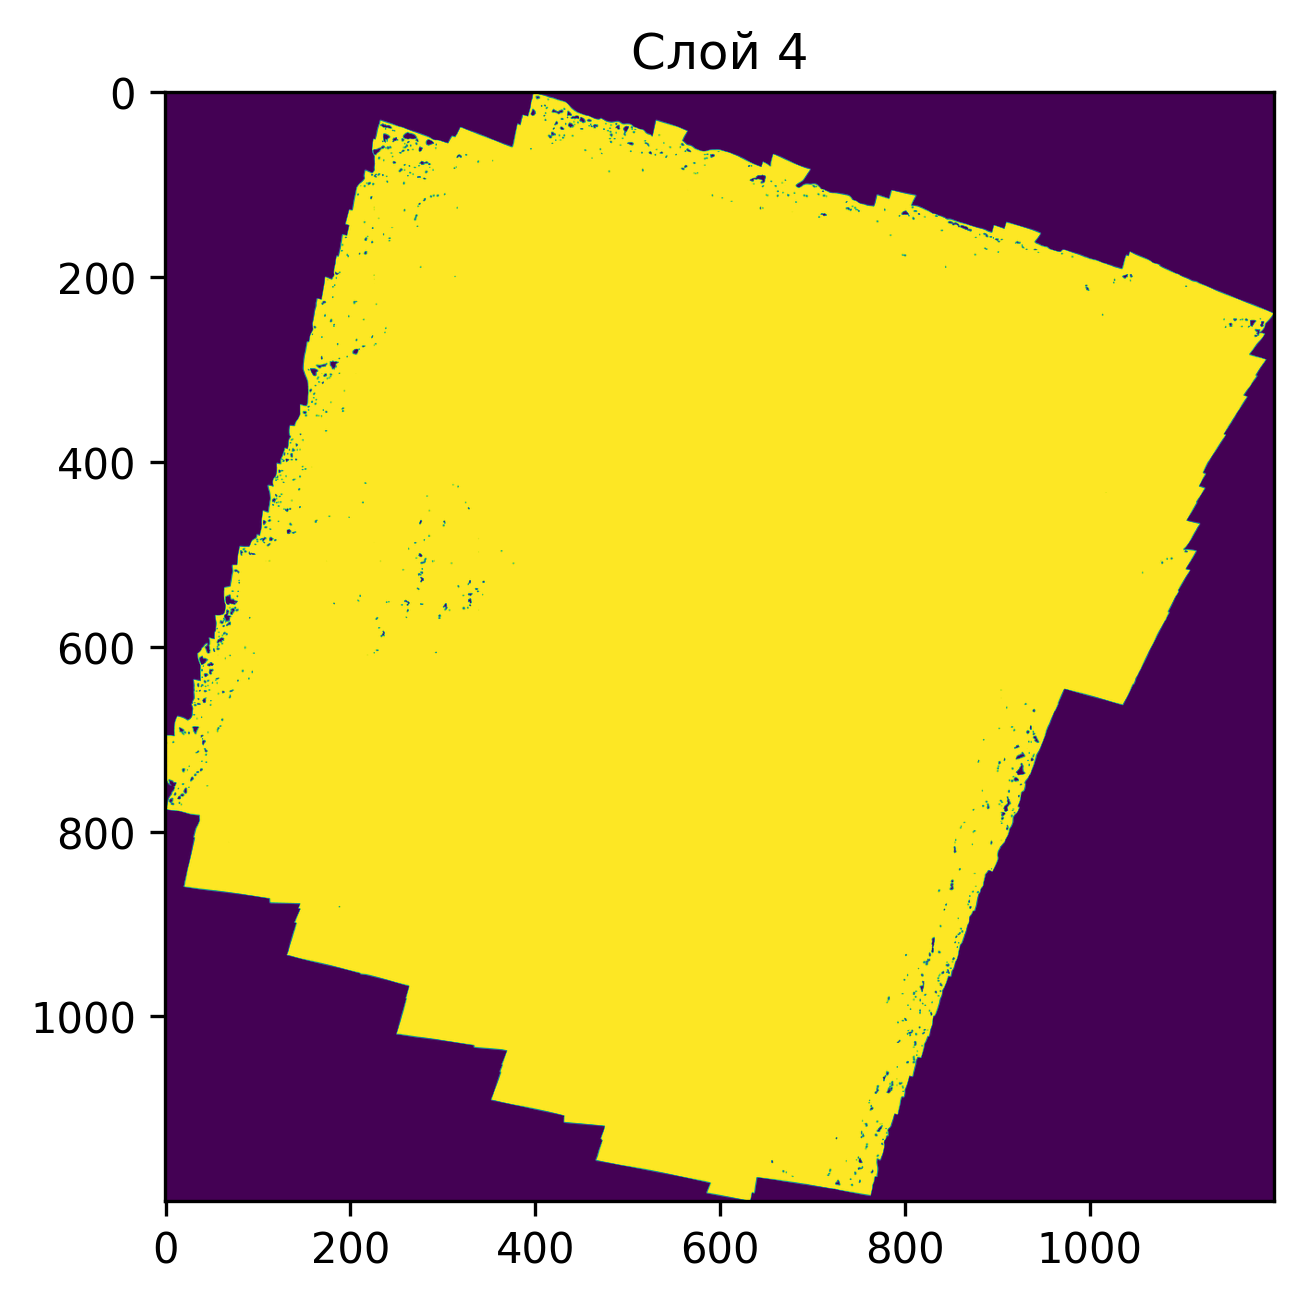

In [9]:
for index, file in enumerate(tiff_processor.output_pathes):
    tiff_processor.show_file(f'{file}_resized.tif', title=f"Слой {index+1}")

In [10]:
!ls

2013.06.16_VID.tif
2018.08.09_Field_14_VIS_band1.tif
2018.08.09_Field_14_VIS_band1.tif_resized.tif
2018.08.09_Field_14_VIS_band2.tif
2018.08.09_Field_14_VIS_band2.tif_resized.tif
2018.08.09_Field_14_VIS_band3.tif
2018.08.09_Field_14_VIS_band3.tif_resized.tif
2018.08.09_Field_14_VIS_band4.tif
2018.08.09_Field_14_VIS_band4.tif_resized.tif
2018.08.09_Field_14_VIS.tif
20210721_F25_Micasense.tif
sample_data


In [11]:
del tiff_processor

Попробуем второй файл

In [1]:
# Параметры работы класса
input_file = "2013.06.16_VID.tif"
size = (1200, 1200)

In [4]:
tiff_processor = TiffProcessor(input_file)

In [ ]:
tiff_processor.split_bands()

Количество слоев: 4
Размерность: (52747, 35640)
Пространственная привязка:
 | 0.00, 0.00,-14.00|
| 0.00,-0.00, 11.79|
| 0.00, 0.00, 1.00|


  0%|          | 0/4 [00:00<?, ?it/s]

Характеристики слоя 1:
Минимальное значение: 0
Максимальное значение: 255
Среднее значение: 184.6032996621294


In [ ]:
!ls

In [ ]:
tiff_processor.resize_layers(size=size)

In [ ]:
for index, file in enumerate(tiff_processor.output_pathes):
    tiff_processor.show_file(f'{file}_resized.tif', title=f"Слой {index+1}")

In [ ]:
del tiff_processor

Попробуем третий файл

In [ ]:
# Параметры работы класса
input_file = "20210721_F25_Micasense.tif"
size = (1200, 1200)

In [ ]:
tiff_processor = TiffProcessor(input_file)

In [ ]:
tiff_processor.split_bands(show=False)

In [ ]:
tiff_processor.resize_layers(size=size)

In [ ]:
for index, file in enumerate(tiff_processor.output_pathes):
    tiff_processor.show_file(f'{file}_resized.tif', title=f"Слой {index+1}")

In [ ]:
del tiff_processor